# Task 3

### Part 1

In [1]:
import pandas as pd
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
aws_credentials ={"key": "","secret": ""}
df = pd.read_csv("s3://mds-s3-student67/output/ml_data_SYD.csv", index_col=0, parse_dates=True, storage_options=aws_credentials)

In [3]:
df = df.dropna().rename(columns = {"observed_syd":"Observed"})
df

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


In [4]:
# Doing our train test split
train_df, test_df = train_test_split(df, test_size = .2, random_state=123)

In [5]:
# Creating our X_train and Y_train
X_train = train_df.drop('Observed', axis = 1)
Y_train = train_df['Observed'] 
X_test = test_df.drop('Observed', axis = 1)
Y_test = test_df['Observed'] 

##### EDA

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-rhtio9jl because the default path (/home/jupyter-student67/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:xlabel='month'>

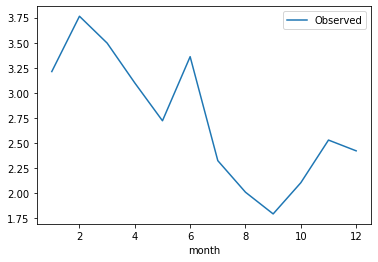

In [6]:
# A bit of feature engineering 
# We add a month and a day of the year feature and then drop time
#df['day_of_year'] = pd.to_datetime(df['time']).dt.dayofyear
#df['month'] = pd.to_datetime(df['time']).dt.month
climate_data = train_df.reset_index()
climate_data['time'] = pd.to_datetime(climate_data['time'])
climate_data['month'] = climate_data.time.dt.month
climate_data.groupby("month").mean('Observed')[['Observed']].plot()

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36791 entries, 1953-10-26 to 1932-01-31
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCESS-CM2        36791 non-null  float64
 1   ACCESS-ESM1-5     36791 non-null  float64
 2   AWI-ESM-1-1-LR    36791 non-null  float64
 3   BCC-CSM2-MR       36791 non-null  float64
 4   BCC-ESM1          36791 non-null  float64
 5   CMCC-CM2-HR4      36791 non-null  float64
 6   CMCC-CM2-SR5      36791 non-null  float64
 7   CMCC-ESM2         36791 non-null  float64
 8   CanESM5           36791 non-null  float64
 9   EC-Earth3-Veg-LR  36791 non-null  float64
 10  FGOALS-g3         36791 non-null  float64
 11  GFDL-CM4          36791 non-null  float64
 12  INM-CM4-8         36791 non-null  float64
 13  INM-CM5-0         36791 non-null  float64
 14  KIOST-ESM         36791 non-null  float64
 15  MIROC6            36791 non-null  float64
 16  MPI-ESM-1-2-HAM   36791

In [15]:
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


##### Machine Learning 

In [38]:
rfr = RandomForestRegressor()

In [39]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [40]:
print(f"Train RMSE: {mean_squared_error(Y_train, rfr.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(Y_test, rfr.predict(X_test), squared=False):.2f}")

Train RMSE: 3.08
 Test RMSE: 8.85


In [41]:
preds = rfr.predict(X_test)

In [42]:
new_col = pd.DataFrame(Y_test)

In [43]:
new_col['preds'] = preds

<AxesSubplot:xlabel='time'>

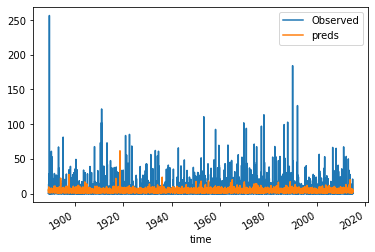

In [44]:
new_col.plot()

We were able to improve predictions using the ensemble technique but we still had a pretty large amount of error compared to the actual observed rainfall in Sydney.

### Part 2

In [47]:
bestmodel = RandomForestRegressor(n_estimators=100, max_depth=5)
bestmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5)

In [48]:
print(f"Train RMSE: {mean_squared_error(Y_train, bestmodel.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(Y_test, bestmodel.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
 Test RMSE: 8.65


In [51]:
# ready to deploy
dump(bestmodel, "model.joblib")

['model.joblib']